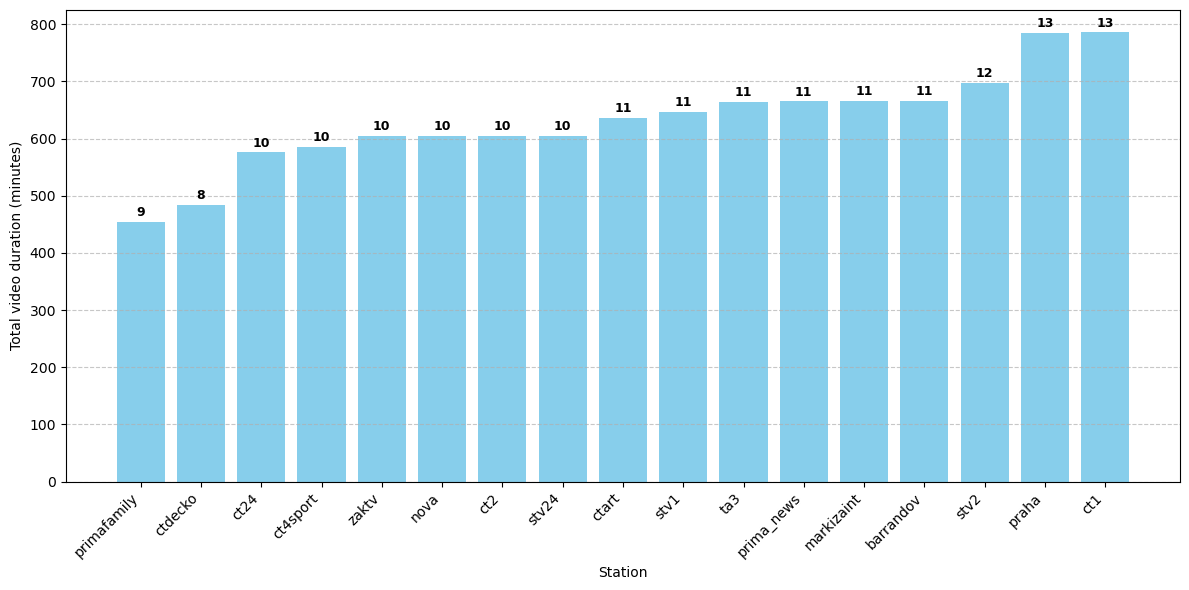

In [21]:
import json
import matplotlib.pyplot as plt

# Load JSON data from file
with open('length_stat.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Get station info
station_info = data["stanice_info"]

# Create lists of stations, total durations and counts
stations = list(station_info.keys())
durations = [station_info[s]["total_duration"] for s in stations]
counts = [station_info[s]["count"] for s in stations]

# Sort by durations ascending (to keep bars sorted)
sorted_data = sorted(zip(stations, durations, counts), key=lambda x: x[1])

# Unpack sorted data
stations_sorted, durations_sorted, counts_sorted = zip(*sorted_data)

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(stations_sorted, durations_sorted, color='skyblue')
plt.xlabel('Station')
plt.ylabel('Total video duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add text labels for counts above bars
for bar, count in zip(bars, counts_sorted):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{count}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Save the histogram
plt.savefig('histogram_video_duration_by_station.pdf')
plt.show()

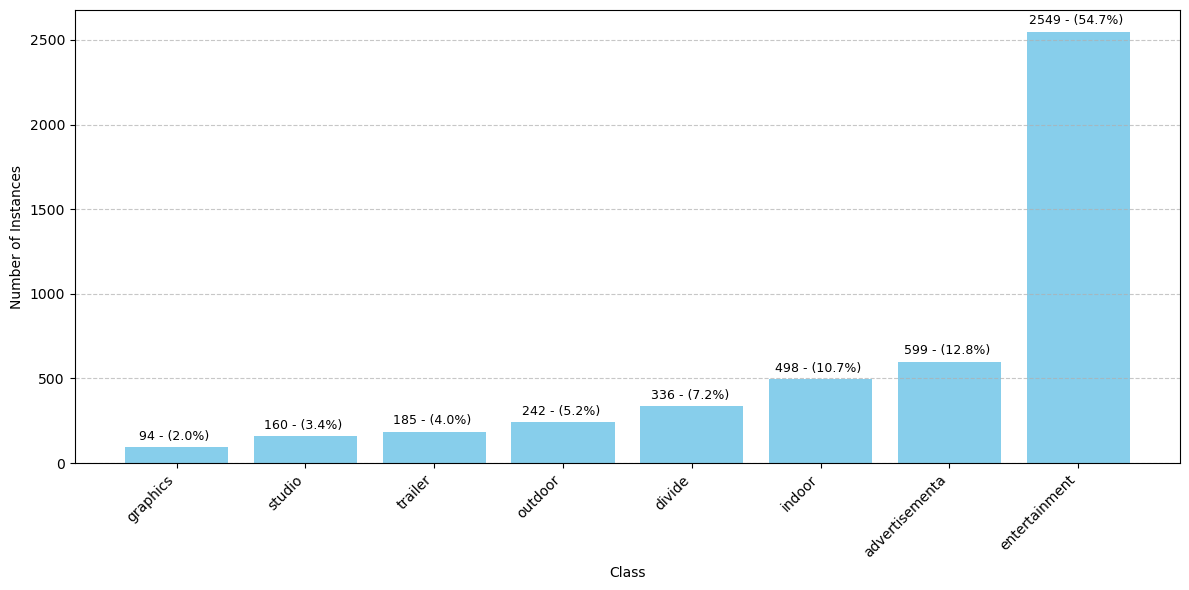

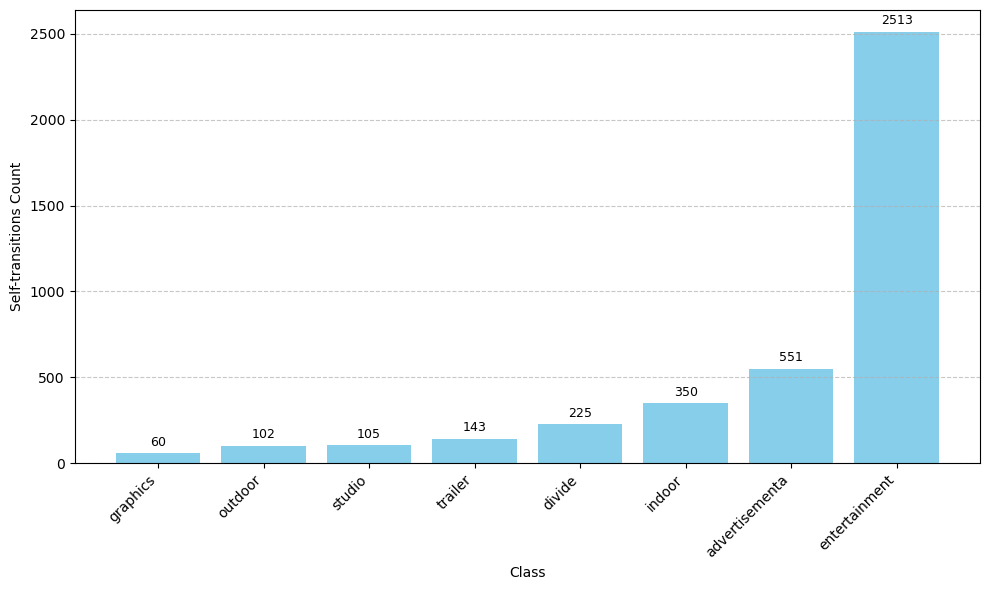

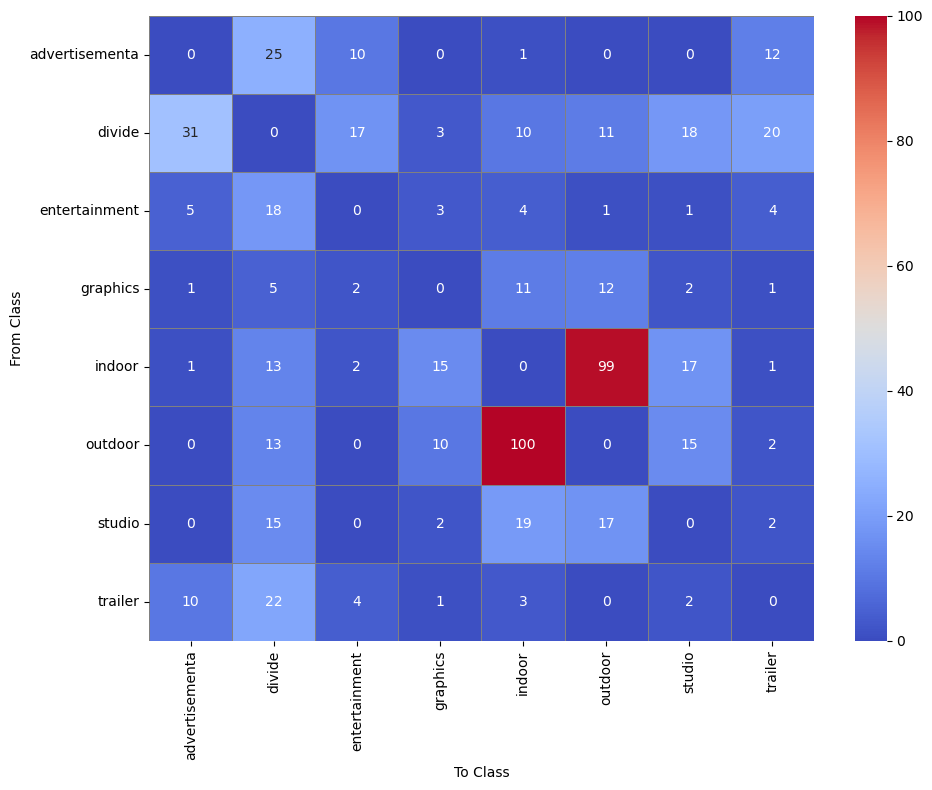

In [22]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Načti data
with open('dataset_stat.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# --- Histogram: sample_counts_per_class (s procenty nad sloupci) ---

sample_counts = data['sample_counts_per_class']
class_data = [(c, sample_counts[c]['count'], sample_counts[c]['percentage']) for c in sample_counts]
class_data_sorted = sorted(class_data, key=lambda x: x[1])
classes_sorted = [c[0] for c in class_data_sorted]
counts_sorted = [c[1] for c in class_data_sorted]
percentages_sorted = [c[2] for c in class_data_sorted]

plt.figure(figsize=(12,6))
bars = plt.bar(classes_sorted, counts_sorted, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Přidání textu s procenty nad každý sloupec
for bar, pct, count in zip(bars, percentages_sorted, counts_sorted):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max(counts_sorted)*0.01,
             f'{count} - ({pct:.1f}%) ', ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.savefig('sample_counts_histogram.pdf')
plt.show()


# --- Přechodová matice: class_transitions ---

transitions = data['class_transitions']

# Třídy a indexace
all_classes = set()
for key in transitions.keys():
    from_class, to_class = key.split(' to ')
    all_classes.add(from_class)
    all_classes.add(to_class)
all_classes = sorted(all_classes)
class_to_idx = {c: i for i, c in enumerate(all_classes)}

# Matice přechodů
conf_matrix = np.zeros((len(all_classes), len(all_classes)), dtype=int)
for key, count in transitions.items():
    from_class, to_class = key.split(' to ')
    i = class_to_idx[from_class]
    j = class_to_idx[to_class]
    conf_matrix[i, j] = count

# Ulož si diagonálu pro samostatný histogram
self_transitions = np.diag(conf_matrix).copy()

# Vynuluj diagonálu – chceme jen přechody mezi různými třídami
np.fill_diagonal(conf_matrix, 0)


# --- Histogram: Self-transitions (vynulovaná diagonála) ---
self_data = sorted(zip(all_classes, self_transitions), key=lambda x: x[1])
classes_diag, diag_counts = zip(*self_data)

plt.figure(figsize=(10,6))
bars = plt.bar(classes_diag, diag_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Self-transitions Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Přidání hodnot nad sloupce
for bar, count in zip(bars, diag_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max(diag_counts)*0.01, f'{count}', 
             ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.savefig('self_transitions_histogram.pdf')
plt.show()

# --- Heatmapa bez diagonály ---

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=all_classes, yticklabels=all_classes,
            linecolor='gray', linewidth=0.5)
plt.xlabel('To Class')
plt.ylabel('From Class')
plt.tight_layout()
plt.savefig('class_transition_confusion_matrix_no_diag.pdf')
plt.show()




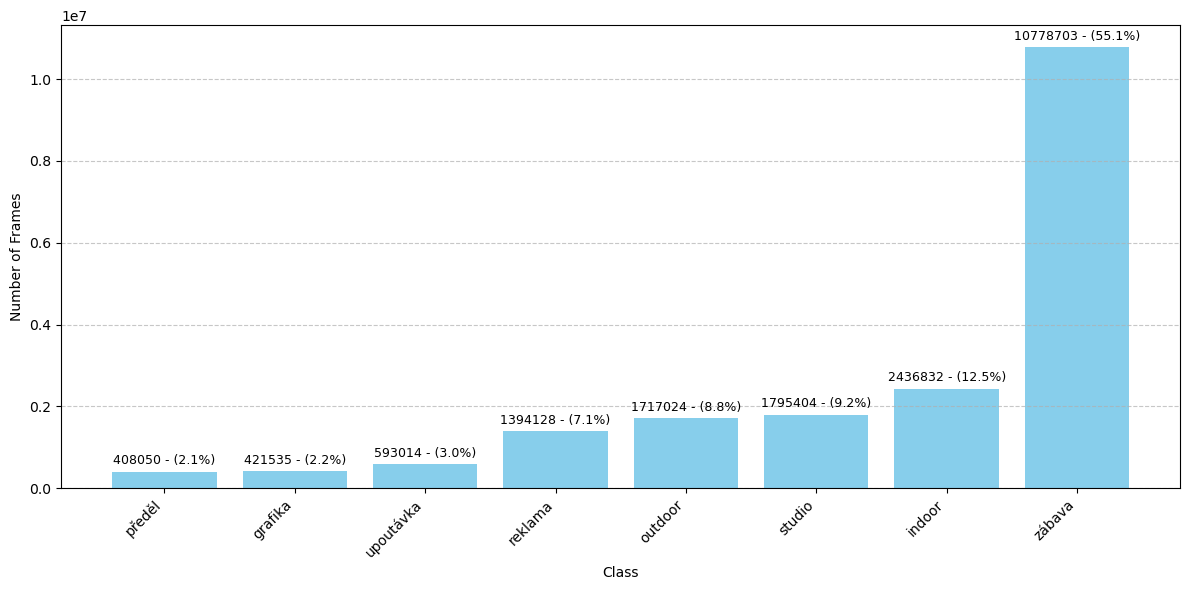

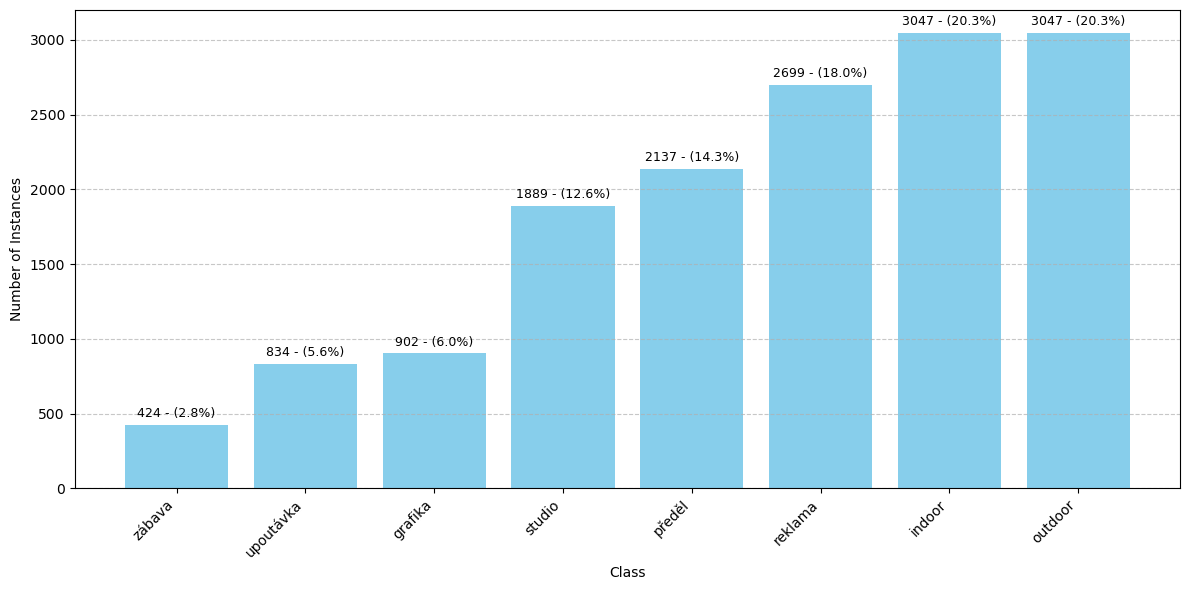

In [23]:
import json
import matplotlib.pyplot as plt

# Načti data
with open('frame_stat.json', 'r', encoding='cp1250') as f:
    data = json.load(f)

# Funkce na vykreslení histogramu s přidanými hodnotami nad sloupci
def plot_sorted_histogram(data_dict, title, xlabel, ylabel, filename, show_percent=False, total=None):
    # Seřadit podle hodnot
    items_sorted = sorted(data_dict.items(), key=lambda x: x[1])
    classes = [x[0] for x in items_sorted]
    values = [x[1] for x in items_sorted]

    plt.figure(figsize=(12,6))
    bars = plt.bar(classes, values, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Přidání čísel/procent nad sloupce
    for bar, val in zip(bars, values):
        height = bar.get_height()
        if show_percent and total:
            pct = val / total * 100
            label = f'{val} - ({pct:.1f}%)'
        else:
            label = f'{val}'
        plt.text(bar.get_x() + bar.get_width()/2, height + max(values)*0.01, label,
                 ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Histogram pro frames_per_class + procenta
total_frames = sum(data['frames_per_class'].values())
plot_sorted_histogram(data['frames_per_class'],
                      title='Number of Frames per Class',
                      xlabel='Class',
                      ylabel='Number of Frames',
                      filename='frames_per_class.pdf',
                      show_percent=True,
                      total=total_frames)

# Histogram pro instances_per_class + procenta
total_instances = sum(data['instances_per_class'].values())
plot_sorted_histogram(data['instances_per_class'],
                      title='Number of Instances per Class',
                      xlabel='Class',
                      ylabel='Number of Instances',
                      filename='instances_per_class.pdf',
                      show_percent=True,
                      total=total_instances)

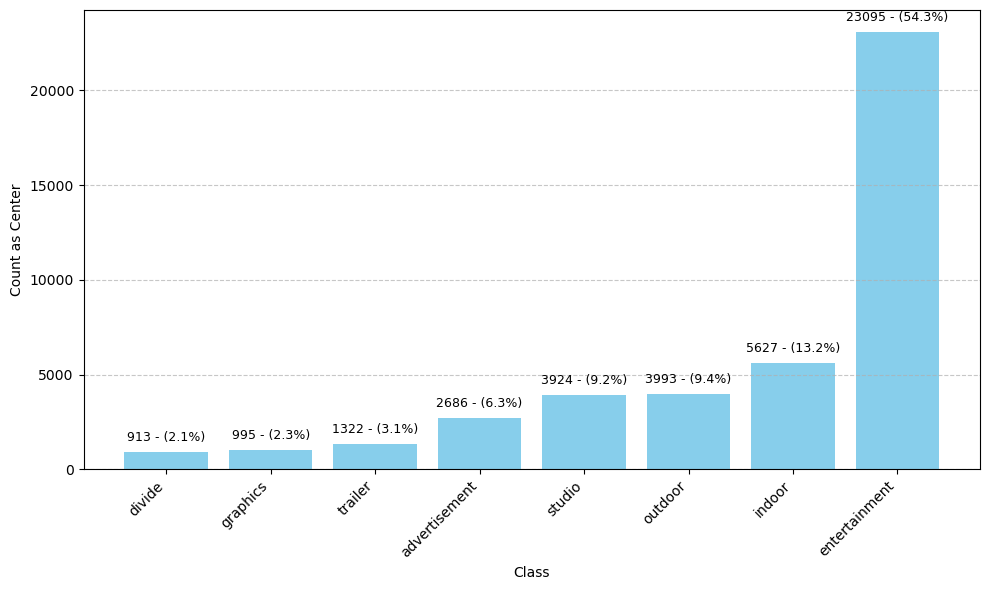

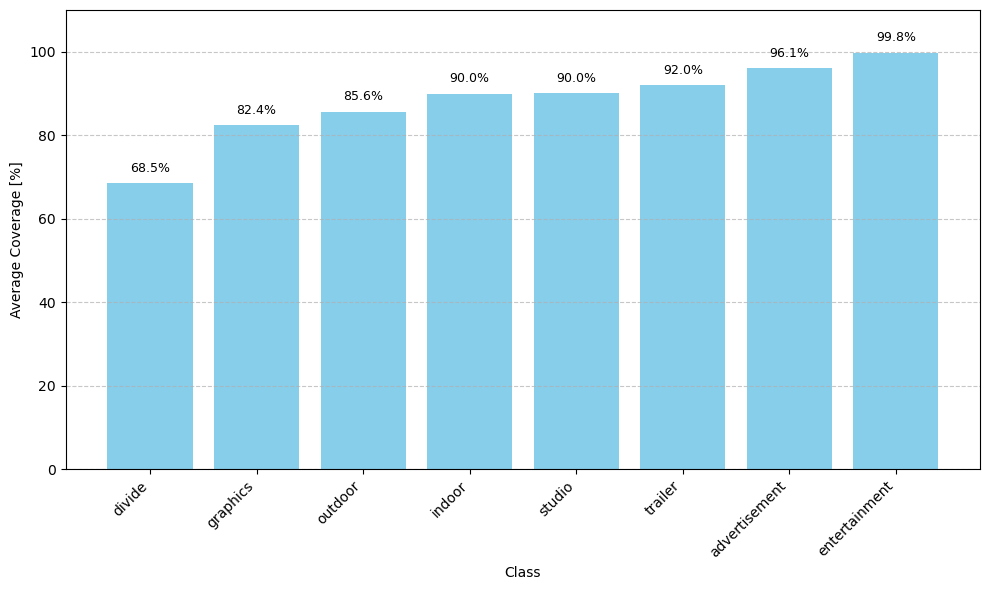

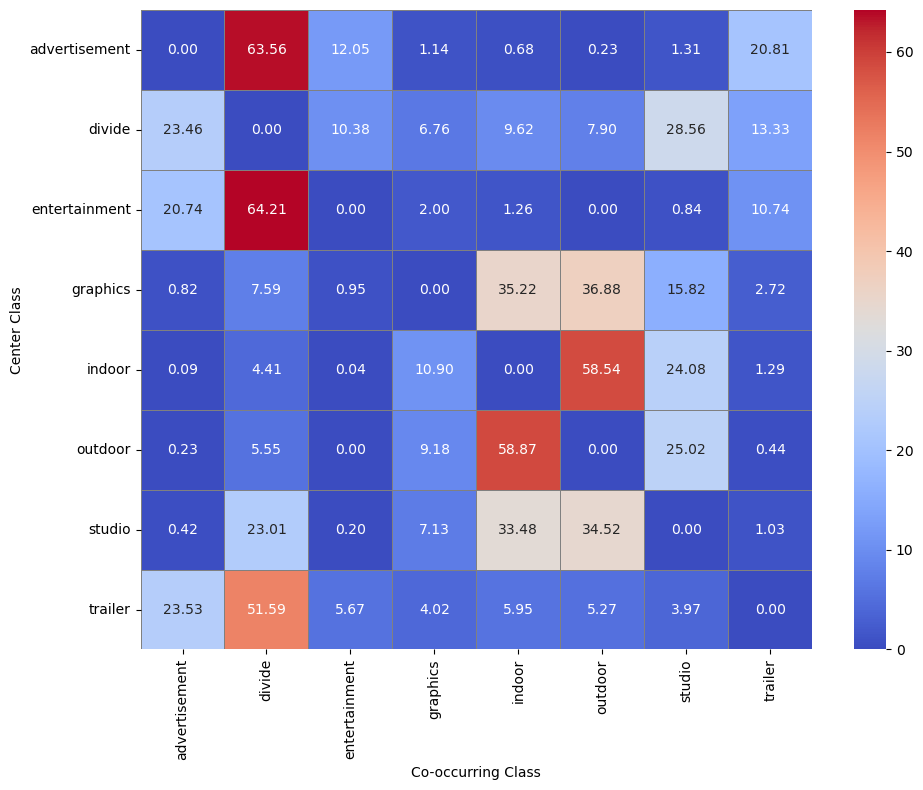

In [24]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Načti data
with open('stream_stat.json', 'r', encoding='cp1250') as f:
    data = json.load(f)

# --- 1) Barplot center_class_counts --- s čísly a procenty nad sloupci

center_counts = data['center_class_counts']
# Seřadit podle hodnot vzestupně
center_counts_sorted = sorted(center_counts.items(), key=lambda x: x[1])
classes, counts = zip(*center_counts_sorted)  # rozbalení do dvou seznamů
total = sum(counts)

plt.figure(figsize=(10,6))
bars = plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count as Center')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Přidání hodnot a procent nad sloupce
for bar, count in zip(bars, counts):
    height = bar.get_height()
    percent = (count / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height + total * 0.01, 
             f'{count} - ({percent:.1f}%)', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('center_class_counts_sorted.pdf')
plt.show()

# --- 2) Barplot average_class_coverage ---

coverage = data['average_class_coverage']
# Seřadit podle hodnot vzestupně
coverage_sorted = sorted(coverage.items(), key=lambda x: x[1])
classes, coverages = zip(*coverage_sorted)

plt.figure(figsize=(10,6))
bars = plt.bar(classes, coverages, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Average Coverage [%]')
plt.ylim(0, 110)
plt.xticks(rotation=45, ha='right')

# Přidání hodnot nad sloupce
for bar, cov in zip(bars, coverages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{cov:.1f}%', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('average_class_coverage_sorted.pdf')
plt.show()

# --- 3) Heatmapa class_cooccurrences ---

cooccurrences = data['class_cooccurrences']
classes = sorted(cooccurrences.keys())

# Vytvoř matici (2D list) procent
matrix = []
for c1 in classes:
    row = []
    for c2 in classes:
        val = cooccurrences[c1].get(c2, 0)  # Pokud chybí, dá 0
        row.append(val)
    matrix.append(row)

plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            xticklabels=classes, yticklabels=classes,
            linewidths=0.5, linecolor='gray')
plt.xlabel('Co-occurring Class')
plt.ylabel('Center Class')
plt.tight_layout()
plt.savefig('class_cooccurrences_heatmap.pdf')
plt.show()